In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset from the uploaded file
bh_data = pd.read_csv('D:/CS Classes at GT/CS 7641 - ML/ASSIGNMENT-1/boston.csv')
print(bh_data.head())
print(bh_data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

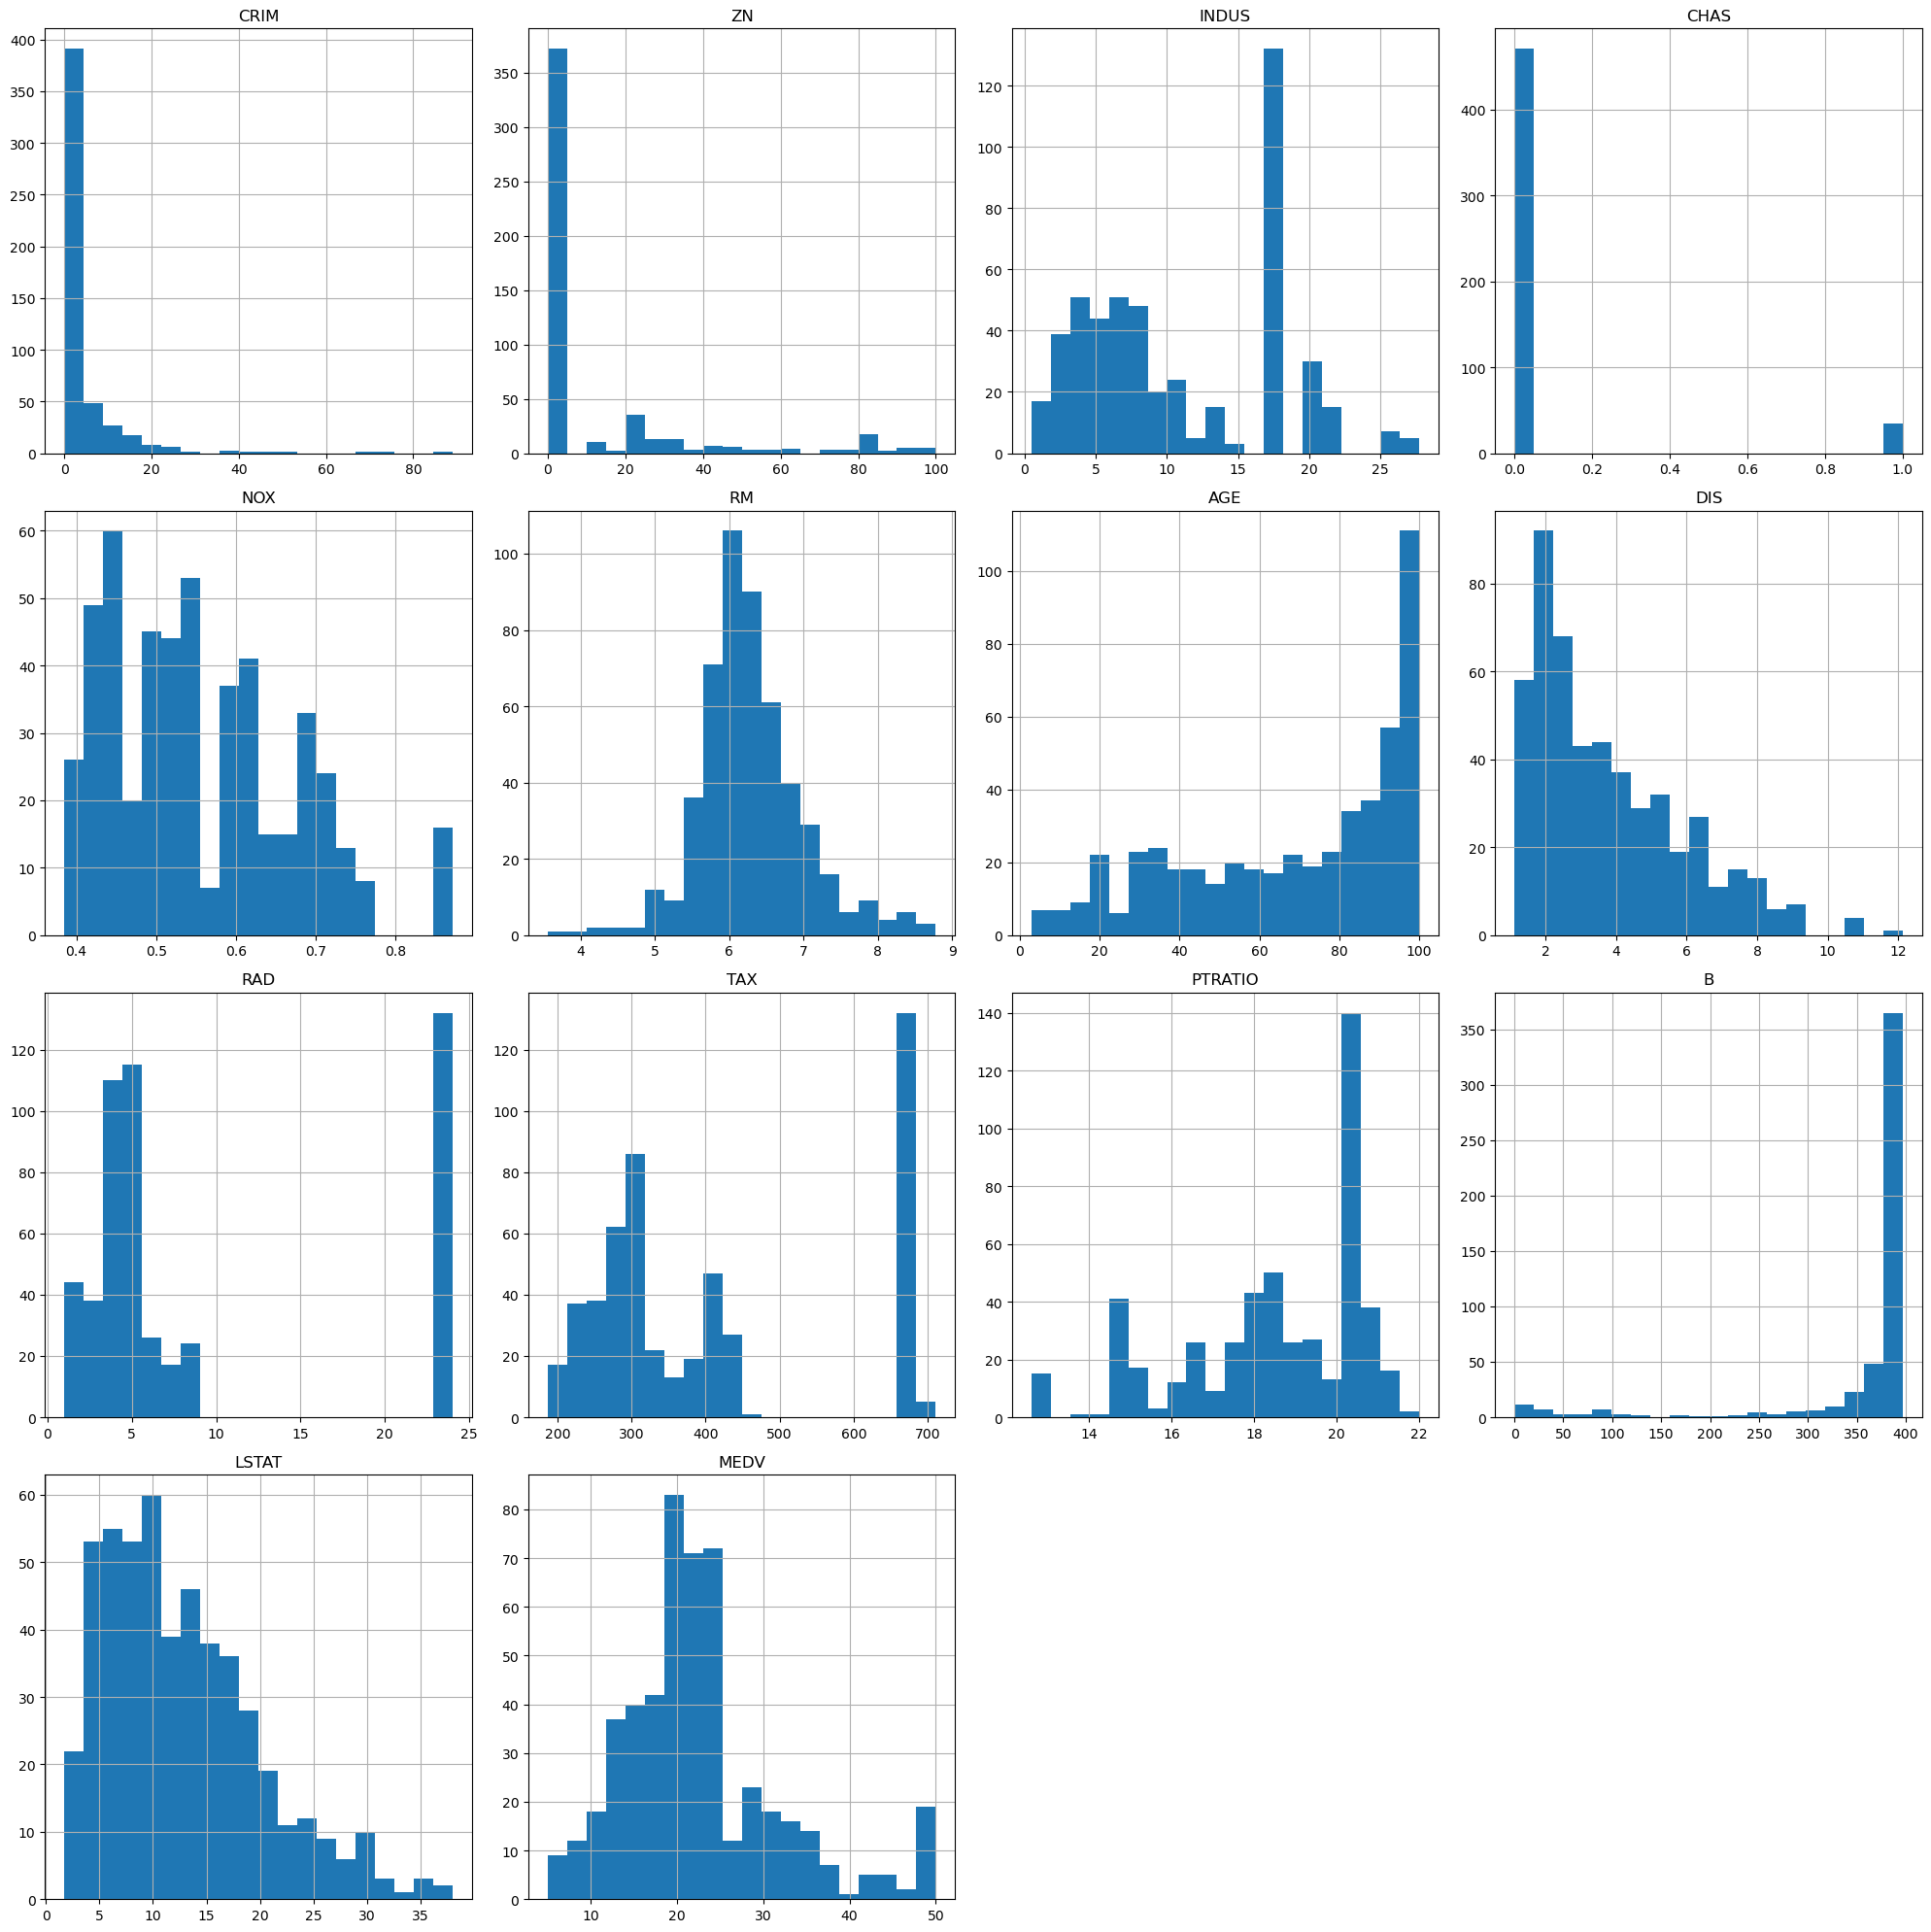

In [4]:
# Visualize the distribution of each feature in the dataset
bh_data.hist(figsize=(20, 20), bins=20)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


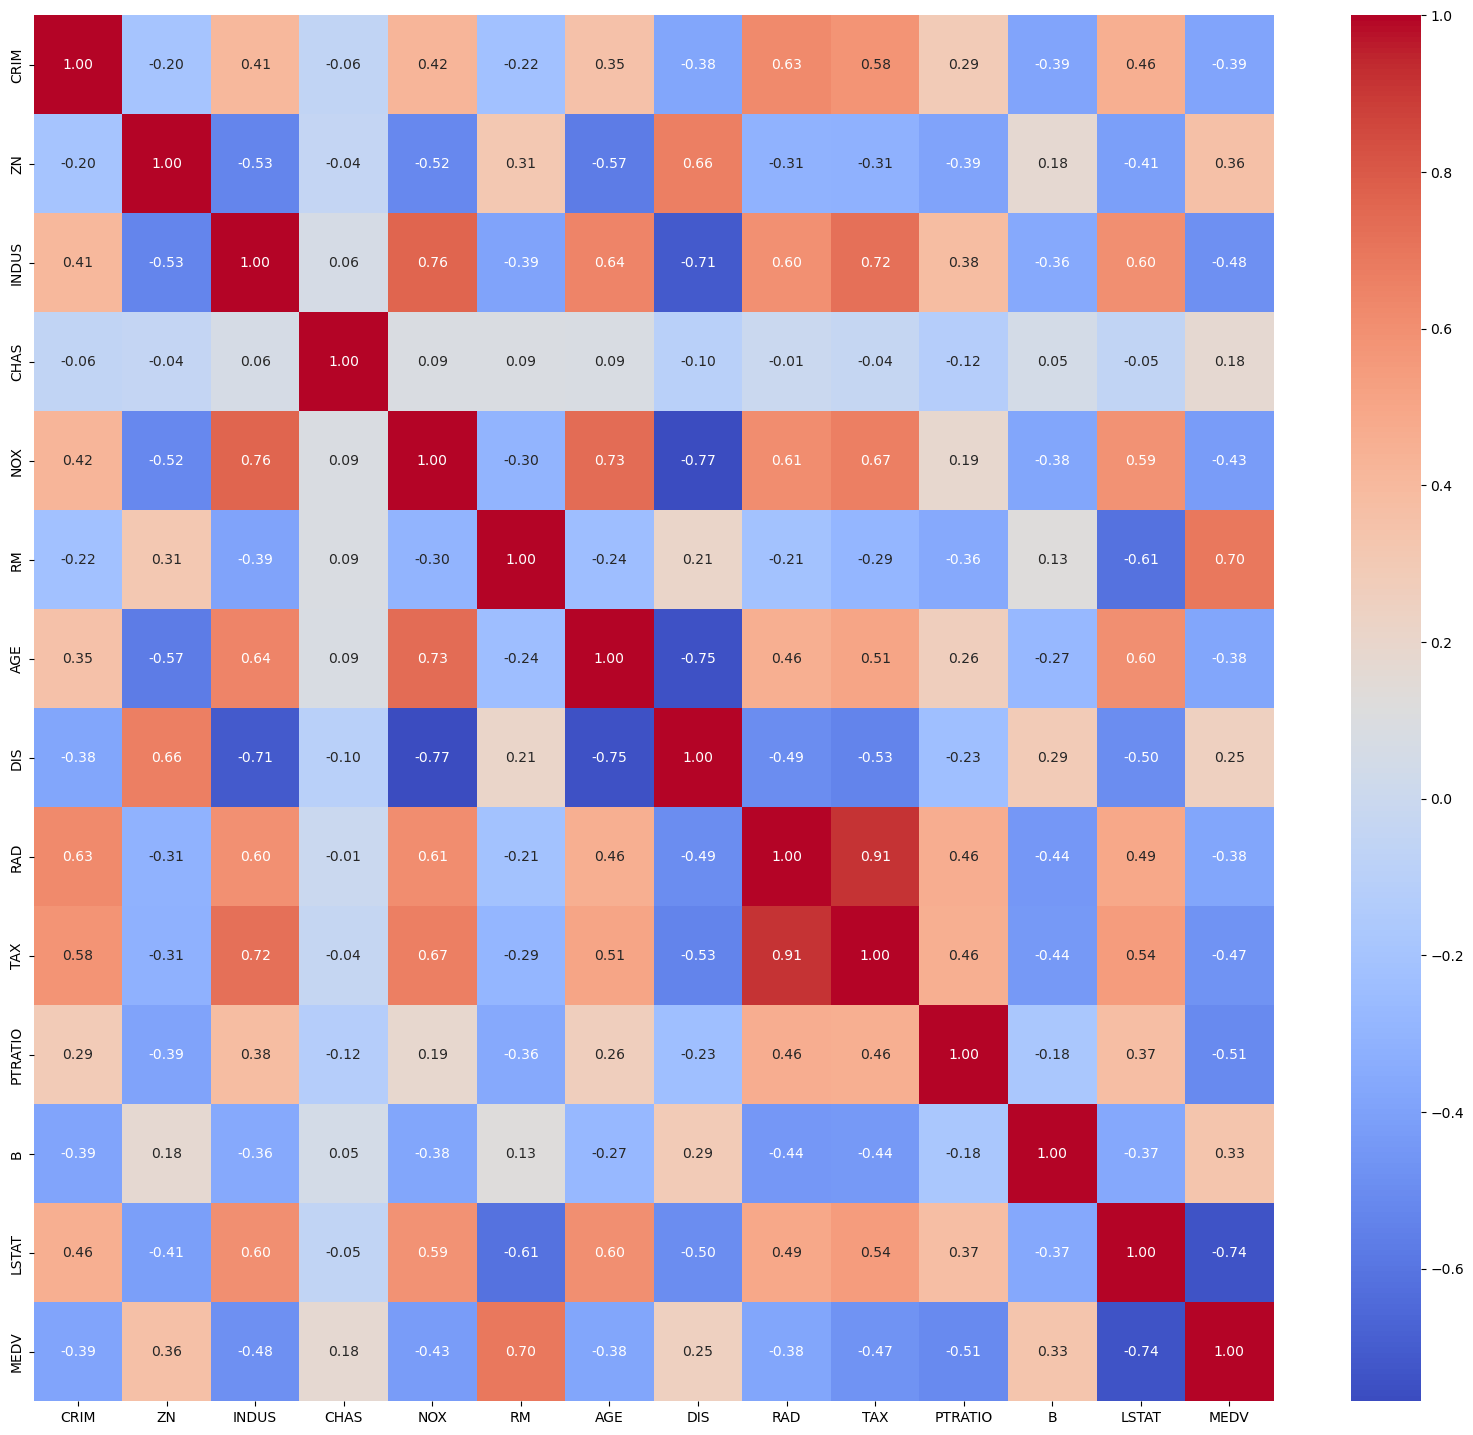

In [5]:
plt.figure(figsize=(20, 18))
# Generate a heatmap for the correlation matrix of the Boston Housing dataset
sns.heatmap(bh_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

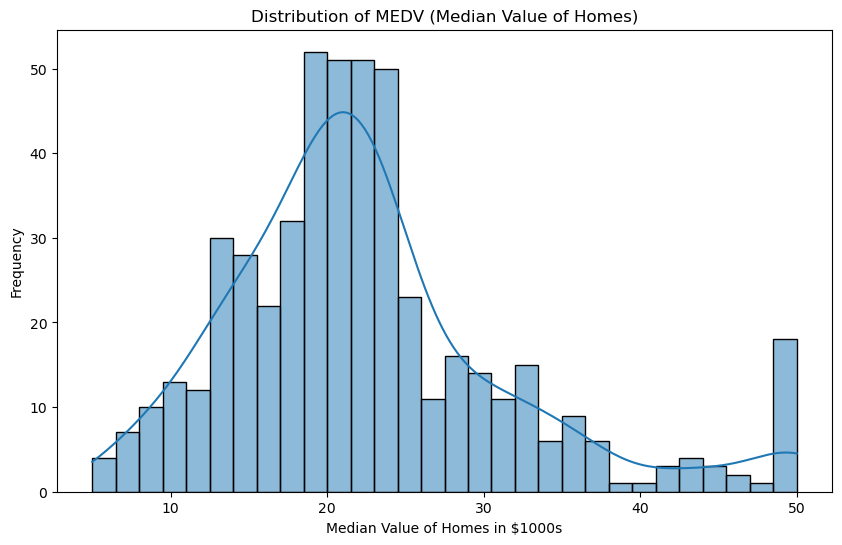

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(bh_data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('Median Value of Homes in $1000s')
plt.ylabel('Frequency')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (independent variables) and the target (dependent variable)
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choose a weak learner and aggressively prune tree
weak_learner = DecisionTreeRegressor(max_depth=1)

# Instantiate AdaBoost with the weak learner
ada_reg = AdaBoostRegressor(
    base_estimator=weak_learner,
    n_estimators=50,  # initial number of trees
    learning_rate=1,  # initial learning rate
    random_state=42
)


In [24]:
# Fit the AdaBoost regressor to the training data
ada_reg.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1, random_state=42)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

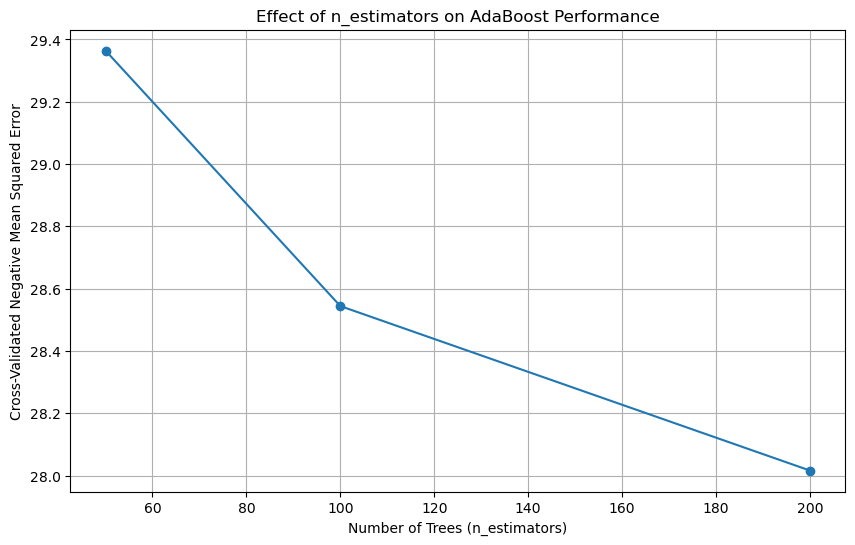

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search for AdaBoostRegressor
grid_search = GridSearchCV(ada_reg, param_grid, cv=5, scoring='neg_mean_squared_error')  # Adjust scoring to a regression metric

# Perform grid search
grid_search.fit(X_train, y_train)

# Convert the grid search results to a DataFrame for easier manipulation
results = pd.DataFrame(grid_search.cv_results_)

# Extract mean test scores for each combination where 'param_n_estimators' was varied
mean_test_scores = -results.loc[results['param_n_estimators'].isin(param_grid['n_estimators']), 'mean_test_score']  # Note: Negate scores because they are negative

# Since we have multiple entries for each 'n_estimators' due to other parameters changing,
# we need to average over them to get a single score per 'n_estimators' value
mean_scores_by_n_estimators = mean_test_scores.groupby(results['param_n_estimators']).mean()

# Now we can plot the scores
plt.figure(figsize=(10, 6))
plt.plot(mean_scores_by_n_estimators.index, mean_scores_by_n_estimators.values, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Negative Mean Squared Error')
plt.title('Effect of n_estimators on AdaBoost Performance')
plt.grid(True)
plt.show()


In [26]:
# After the grid search has been performed:
best_parameters = grid_search.best_params_
best_score = -grid_search.best_score_  # Note: Negate the score because it's negative for MSE, MAE, etc.

# Print the best parameters and the best score (MSE, MAE, or R^2 depending on your scoring metric)
print("Best parameters found: ", best_parameters)
print("Best score found (MSE): ", best_score)  # Adjust the message based on your scoring metric

# Configure AdaBoost with the best parameters found, using AdaBoostRegressor
best_ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(
        max_depth=best_parameters['base_estimator__max_depth'],
        min_samples_leaf=best_parameters['base_estimator__min_samples_leaf']
    ),
    n_estimators=best_parameters['n_estimators'],
    learning_rate=best_parameters['learning_rate'],
    random_state=42
)

# Fit the best AdaBoost model to the training data
best_ada_reg.fit(X_train, y_train)

# Now you can use best_ada_reg to make predictions and evaluate on the test set


Best parameters found:  {'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 2, 'learning_rate': 1, 'n_estimators': 200}
Best score found (MSE):  16.109894829674456


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                       min_samples_leaf=2),
                  learning_rate=1, n_estimators=200, random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the values for the test set using the best AdaBoost regressor model
y_pred = best_ada_reg.predict(X_test)

# Calculate the Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on the test set: {mae:.4f}')

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on the test set: {mse:.4f}')

# Calculate the R² score on the test set
r2 = r2_score(y_test, y_pred)
print(f'R² score on the test set: {r2:.4f}')


Mean Absolute Error (MAE) on the test set: 2.7452
Mean Squared Error (MSE) on the test set: 15.0177
R² score on the test set: 0.7985


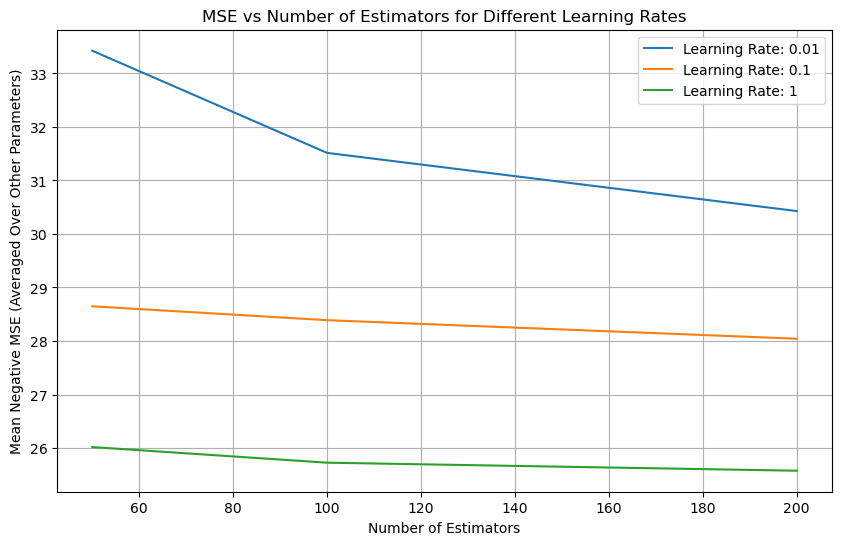

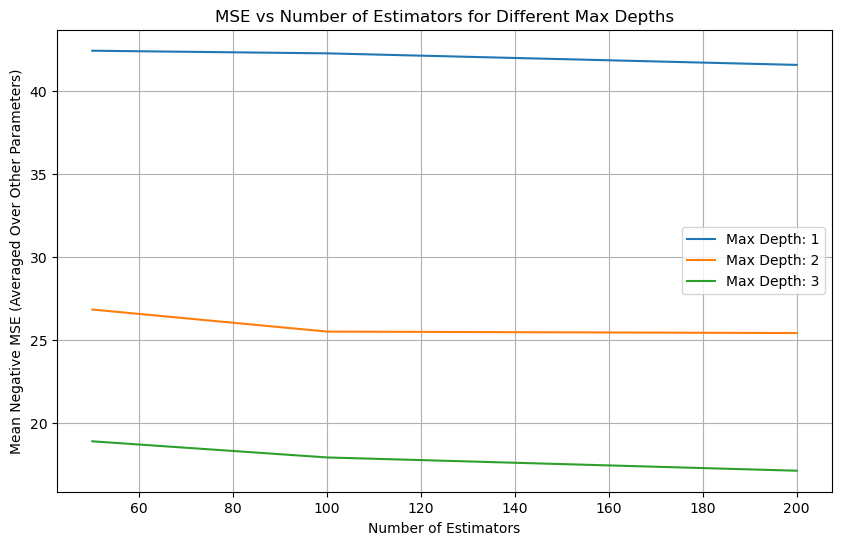

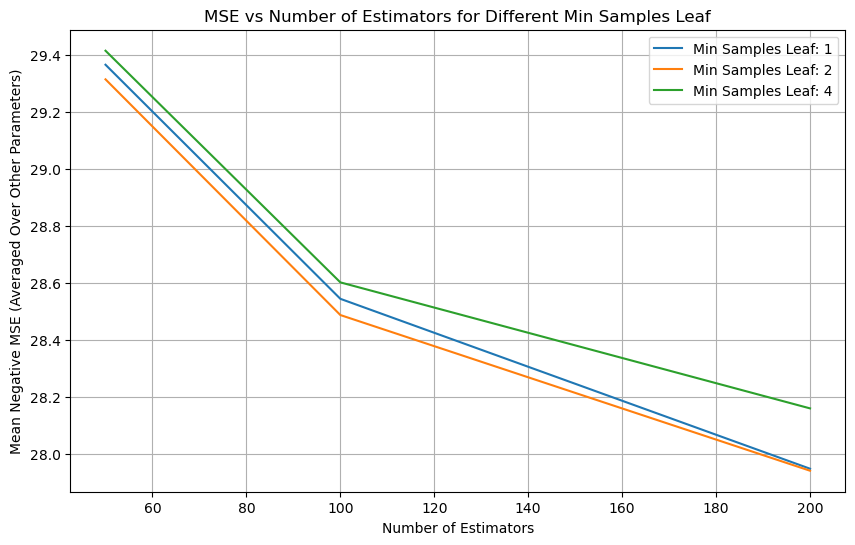

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Simplify the plot for 'learning_rate'
plt.figure(figsize=(10, 6))
for learning_rate in param_grid['learning_rate']:
    # Select only the rows corresponding to the current learning rate
    lr_subset = results[results['param_learning_rate'] == learning_rate]
    # Calculate the mean test score (negated to get MSE) for each number of estimators, averaged over all depths and min_samples_leaf
    scores = -lr_subset.groupby('param_n_estimators')['mean_test_score'].mean()  # Negating the scores to get MSE
    plt.plot(scores.index, scores.values, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Negative MSE (Averaged Over Other Parameters)')
plt.title('MSE vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Simplify the plot for 'max_depth'
plt.figure(figsize=(10, 6))
for max_depth in param_grid['base_estimator__max_depth']:
    # Select only the rows corresponding to the current max depth
    depth_subset = results[results['param_base_estimator__max_depth'] == max_depth]
    # Calculate the mean test score (negated to get MSE) for each number of estimators, averaged over all learning rates and min_samples_leaf
    scores = -depth_subset.groupby('param_n_estimators')['mean_test_score'].mean()  # Negating the scores to get MSE
    plt.plot(scores.index, scores.values, label=f'Max Depth: {max_depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Negative MSE (Averaged Over Other Parameters)')
plt.title('MSE vs Number of Estimators for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()

# Simplify the plot for 'min_samples_leaf'
plt.figure(figsize=(10, 6))
for min_samples_leaf in param_grid['base_estimator__min_samples_leaf']:
    # Select only the rows corresponding to the current min samples leaf
    leaf_subset = results[results['param_base_estimator__min_samples_leaf'] == min_samples_leaf]
    # Calculate the mean test score (negated to get MSE) for each number of estimators, averaged over all learning rates and max depths
    scores = -leaf_subset.groupby('param_n_estimators')['mean_test_score'].mean()  # Negating the scores to get MSE
    plt.plot(scores.index, scores.values, label=f'Min Samples Leaf: {min_samples_leaf}')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Negative MSE (Averaged Over Other Parameters)')
plt.title('MSE vs Number of Estimators for Different Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()


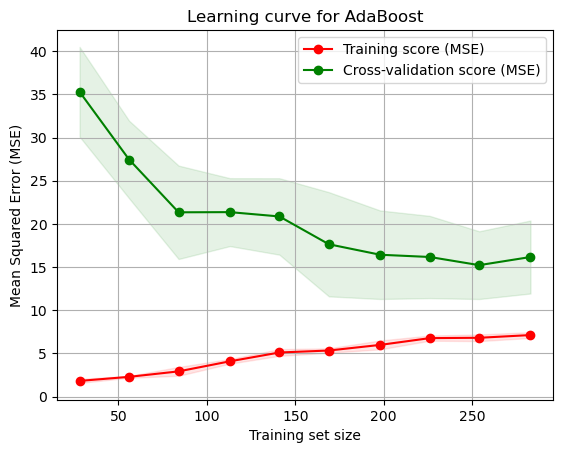

In [29]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_ada_reg,  # Make sure to use your AdaBoost regressor model variable here
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',  # Use a regression metric
    n_jobs=-1
)

# Calculate the average and standard deviation of the train and test scores (negating the scores to interpret as MSE)
train_mean = -np.mean(train_scores, axis=1)  # Negate to convert to positive MSE values
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate to convert to positive MSE values
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score (MSE)')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score (MSE)')

plt.title('Learning curve for AdaBoost')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.grid()
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation using neg_mean_squared_error to evaluate the AdaBoost regressor
cross_val_scores = cross_val_score(
    best_ada_reg,  # Use your best AdaBoost regressor model variable
    X_train, y_train, 
    cv=5, 
    scoring='neg_mean_squared_error'  # Use a regression metric
)

# Since the scores are negative MSE, negate them to interpret as positive MSE values
negated_cross_val_scores = -cross_val_scores

print(f"Cross-validation scores (MSE): {negated_cross_val_scores}")
print(f"Mean CV MSE: {np.mean(negated_cross_val_scores)}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores (MSE): [10.4366224  19.45564468 15.12041024 13.50362781 22.03316901]
Mean CV MSE: 16.109894829674456


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = best_ada_reg.predict(X_test)  # Make sure to use your best AdaBoost regressor model variable

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² score: {r2:.4f}')


Mean Absolute Error: 2.7452
Mean Squared Error: 15.0177
R² score: 0.7985


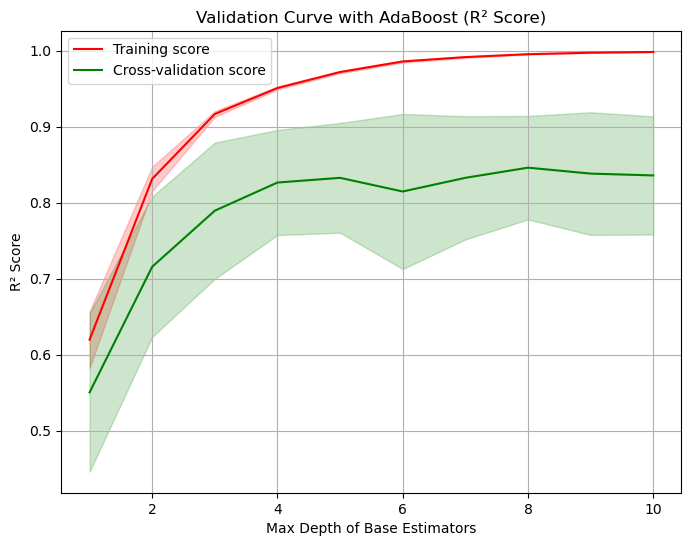

In [32]:
from sklearn.model_selection import validation_curve

# Create range of values for the parameter
param_range = np.arange(1, 11)  # Adjusted to go from 1 to 10

# Calculate R² score on training and test set using the range of parameter values
train_scores, test_scores = validation_curve(
    AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42),
    X_train, y_train,
    param_name="base_estimator__max_depth",
    param_range=param_range,
    cv=5,
    scoring="r2",  # Use R² as the scoring metric for regression
    n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Cross-validation score", color="g")

# Plotting the band of the standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Validation Curve with AdaBoost (R² Score)")
plt.xlabel("Max Depth of Base Estimators")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

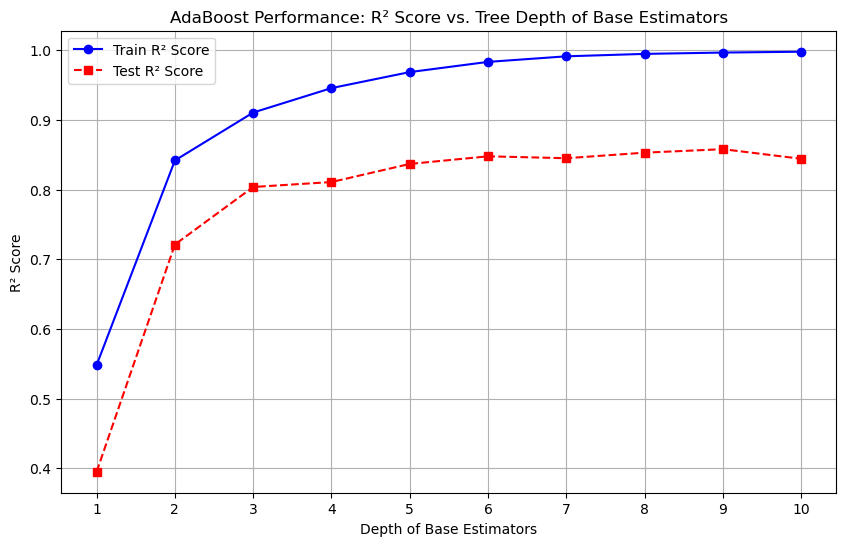

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the range of tree depths to explore
max_depths = range(1, 11)  # Adjust this range based on the previous validation curve results if needed
train_r2_scores = []
test_r2_scores = []

# Loop over the range of tree depths
for depth in max_depths:
    # Initialize and train the AdaBoostRegressor at the given depth
    ada_reg = AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=depth),
        n_estimators=50,  # Keep the number of estimators constant
        learning_rate=1.0,  # You may adjust the learning rate if necessary
        random_state=42
    )
    ada_reg.fit(X_train, y_train)
    
    # Make predictions on both the training and test sets
    y_train_pred = ada_reg.predict(X_train)
    y_test_pred = ada_reg.predict(X_test)
    
    # Calculate and record the R² score for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plotting Train and Test R² Scores vs. Tree Depth for AdaBoost
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_r2_scores, marker='o', linestyle='-', color='blue', label='Train R² Score')
plt.plot(max_depths, test_r2_scores, marker='s', linestyle='--', color='red', label='Test R² Score')
plt.title('AdaBoost Performance: R² Score vs. Tree Depth of Base Estimators')
plt.xlabel('Depth of Base Estimators')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score

# Initialize AdaBoost with DecisionTreeRegressor of max_depth 4
ada_depth_4_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4), 
    n_estimators=200,  # As per your best parameters
    learning_rate=1,
    random_state=42
)

# Perform cross-validation using the R² score as the metric
cv_scores_depth_4 = cross_val_score(ada_depth_4_reg, X_train, y_train, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation R² scores with max_depth 4: {cv_scores_depth_4}")
print(f"Mean CV R² score with max_depth 4: {np.mean(cv_scores_depth_4)}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation R² scores with max_depth 4: [0.90632812 0.7294152  0.87581716 0.86155196 0.70985185]
Mean CV R² score with max_depth 4: 0.8165928583872288


Mean Squared Error: 15.017732416517955
Mean Absolute Error: 2.7451975736973306
R² Score: 0.798455126551014


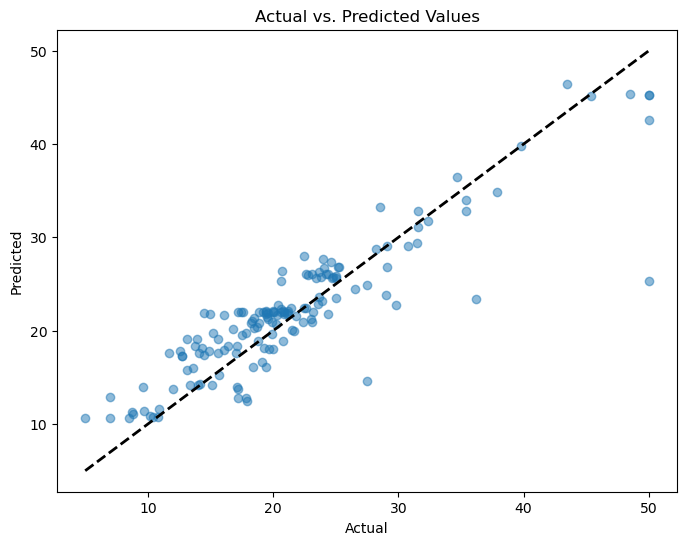

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

# Plotting Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


In [39]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Load and prepare your dataset here
# X_train, X_test, y_train, y_test

# Initialize lists for line plot data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for bar chart data (metrics at 100% training size)
training_time_bar = None
testing_time_bar = None
r2_score_bar = None
mae_bar = None
mse_bar = None

# Loop through training sizes for line plots
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, train_size=size, random_state=42)

    ada_reg = AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=1),
        n_estimators=50,
        learning_rate=1,
        random_state=42
    )

    start_time = time.time()
    ada_reg.fit(X_train_part, y_train_part)
    training_time = time.time() - start_time
    testing_times = []

  # Revised testing time measurement
    start_time = time.perf_counter()
    for _ in range(100):  # Repeat predictions 100 times
        ada_reg.predict(X_test)
    testing_time = (time.perf_counter() - start_time) / 100  # Average testing time

    # Store the averaged testing time
    testing_times.append(testing_time)

    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Metrics for bar chart at 100% training size
ada_reg.fit(X_train, y_train)
y_pred_full_test = ada_reg.predict(X_test)

r2_score_bar = r2_score(y_test, y_pred_full_test)
mae_bar = mean_absolute_error(y_test, y_pred_full_test)
mse_bar = mean_squared_error(y_test, y_pred_full_test)

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['R2-Score', 'MAE', 'MSE'],
    'Value': [r2_score_bar, mae_bar, mse_bar]
})

# Export to Excel
with pd.ExcelWriter(r'D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT-1\Boston Housing- Figures\boston_housing_mlp_performance_analysis.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p